In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# My progs
from my_progs.vlbi.read_ts import get_ts

In [2]:
souname = "0104-408"
coordts = get_ts(souname, "../data/opa")

In [3]:
def iter_fit(x, y, y_err, n_sigma=3, max_iter=100, min_data=10):
    
    x1 = x
    y1 = y
    y1_err = y_err
    y0 = np.array([])
    
    n_iter = 0
    
    while len(y1) != len(y0) and n_iter <= max_iter and len(y1) >= 10:
        
        mod_wls = sm.WLS(y1, sm.add_constant(x1), weights= y1_err ** -2)
        res_wls = mod_wls.fit()
        b, k = res_wls.params
        
        # Removing data points with residual/sigma > n_sigma 
        res = y1 - (x1 * k + b)
        mask = np.abs(res) / y1_err <= n_sigma
        
        x1 = x1[mask]
        y1_err = y1_err[mask] 
        y1, y0 = y1[mask], y1
        
        n_iter += 1
    
    y_pre = x * k + b
        
    return k, b, y_pre

In [4]:
mjy = np.array(coordts["mjy"]-2015)

dra = np.array(coordts["dra"])
dra_err = np.array(coordts["ra_err"])

ddec = np.array(coordts["ddec"])
ddec_err = np.array(coordts["dec_err"])

In [5]:
k, b, dra_pre = iter_fit(mjy, dra, dra_err, n_sigma=10)

print("Slope:     {:2f} mas/yr".format(k))
print("Intercept: {:2f} mas".format(b))

Slope:     -0.023064 mas/yr
Intercept: -0.048709 mas


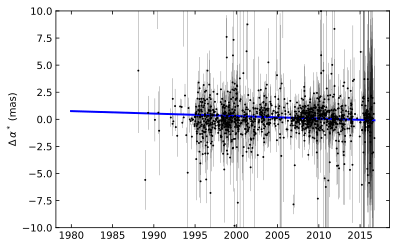

In [6]:
# Plot outputs
plt.errorbar(coordts["mjy"], coordts["dra"], yerr=coordts["ra_err"], 
             color="black", ms=2, fmt=".", elinewidth=0.2)
plt.plot(coordts["mjy"], dra_pre, color="b", linewidth=2, label="Method#1")
plt.ylabel("$\Delta\,\\alpha^*$ (mas)")

plt.ylim([-10, 10])
plt.savefig("../plot/0104-408-ra.eps")

In [9]:
k, b, ddec_pre = iter_fit(mjy, ddec, ddec_err, n_sigma=10)

print("Slope:     {:2f} mas/yr".format(k))
print("Intercept: {:2f} mas".format(b))

Slope:     -0.000195 mas/yr
Intercept: -0.321903 mas


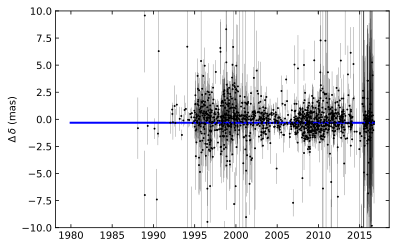

In [10]:
# Plot outputs
plt.errorbar(coordts["mjy"], coordts["ddec"], yerr=coordts["dec_err"], 
             color="black", ms=2, fmt=".", elinewidth=0.2)
plt.plot(coordts["mjy"], ddec_pre, color="b", linewidth=2)
plt.ylabel("$\Delta\,\delta$ (mas)")

plt.ylim([-10, 10])
plt.savefig("../plot/0104-408-dec.eps")